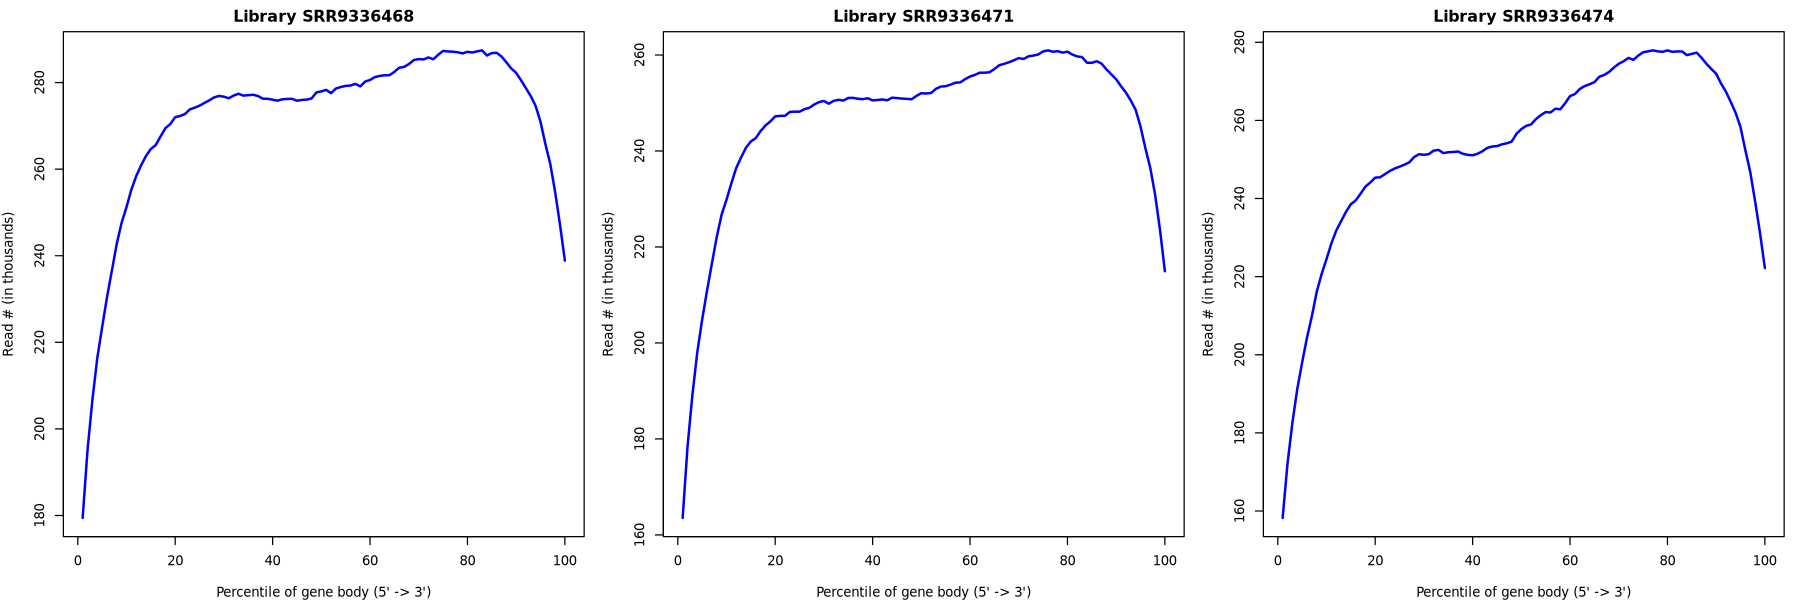

In [1]:
# 在 Jupyter Notebook 的 R 环境中设置图形输出尺寸
options(repr.plot.width = 15, repr.plot.height = 5)

# 读取文件
lines <- readLines("output.geneBodyCoverage.txt")

# 提取数据
percentiles <- list()
for (i in 2:length(lines)) { # 从第2行开始（跳过header）
  line_parts <- unlist(strsplit(lines[i], "\t"))
  file <- line_parts[1]
  percs <- as.numeric(line_parts[-1])
  percentiles[[file]] <- percs
}

# 转换为数据框
df <- as.data.frame(percentiles)

# 定义 x 轴（1到100）
x <- 1:100

# 加载绘图包
library(ggplot2)

# 设置绘图窗口为多图排列（1行3列）
par(mfrow = c(1, 3), mar = c(4, 4, 2, 1))

# 绘制图表
for (i in names(df)) {
  col <- i
  plot(
    x, df[[col]] / 1000,
    type = "l",
    col = "blue",
    lwd = 2,
    xlab = "Percentile of gene body (5' -> 3')",
    ylab = "Read # (in thousands)",
    main = paste("Library", strsplit(col, "_")[[1]][2])
  )
}